In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import pandas as pd
import nglview as nv
import plumed 


In [2]:
def read_cv(colvars_traj, num=1):
    with open(colvars_traj) as rfile:
        lines = rfile.readlines()

    data = []
    for line in lines:
        words = line.split()
        dline = []
        if words[0].isnumeric():
            dline.append(int(words[0]))
            for i in range(num):
                dline.append(float(words[i+1]))
        
            data.append(dline)

    return np.array(data)

    

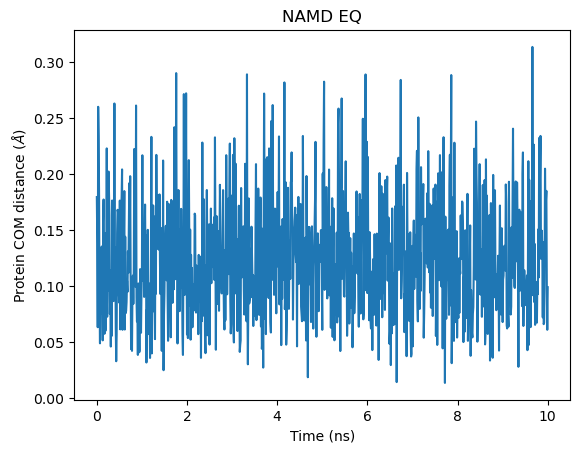

In [3]:
colvars = read_cv('../BFEE_NAMD/000_eq/output/eq.colvars.traj', num=8)
dt = 0.002 # ps
time = colvars[:, 0] * dt / 1000 #(ns)
cv = colvars [:, 8]
plt.plot(time, cv)
plt.xlabel('Time (ns)')
plt.ylabel(r'Protein COM distance ($\AA$)')
plt.title("NAMD EQ")
plt.savefig('figures/eq_NAMD_d1.png')

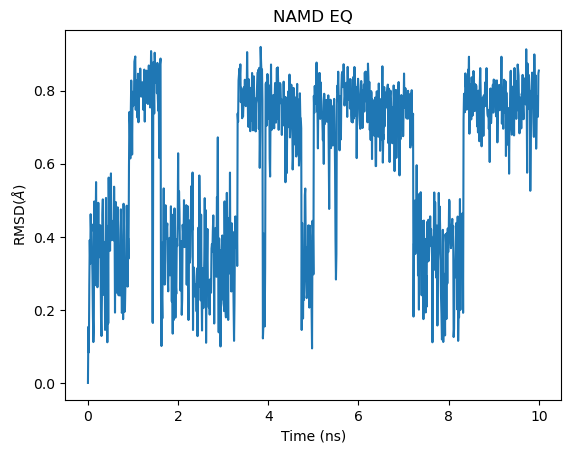

In [4]:
colvars = read_cv('../BFEE_NAMD/000_eq/output/eq.colvars.traj', num=8)
dt = 0.002 # ps
time = colvars[:, 0] * dt / 1000 #(ns)
cv = colvars [:, 1]
plt.plot(time, cv)
plt.xlabel('Time (ns)')
plt.ylabel(r'RMSD($\AA$)')
plt.title("NAMD EQ")
plt.savefig('figures/eq_NAMD_rmsd.png')

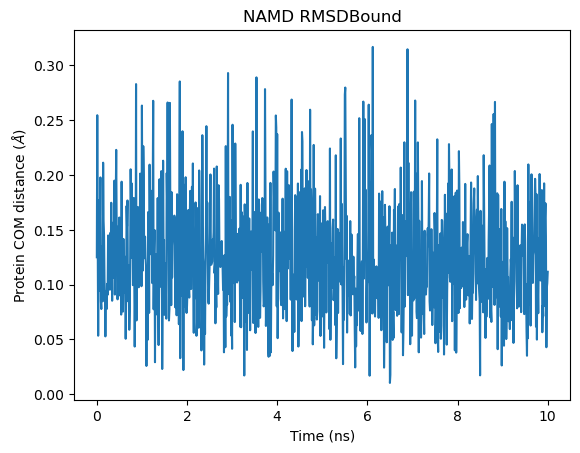

In [5]:
colvars = read_cv('../BFEE_NAMD/001_RMSDBound/output/abf_1.colvars.traj', num=3)
dt = 0.002 # ps
time = colvars[:, 0] * dt / 1000 #(ns)
cv = colvars [:, 3]
plt.plot(time, cv)
plt.xlabel('Time (ns)')
plt.ylabel(r'Protein COM distance ($\AA$)')
plt.title("NAMD RMSDBound")
plt.savefig('figures/rmsdbound_NAMD_d1.png')

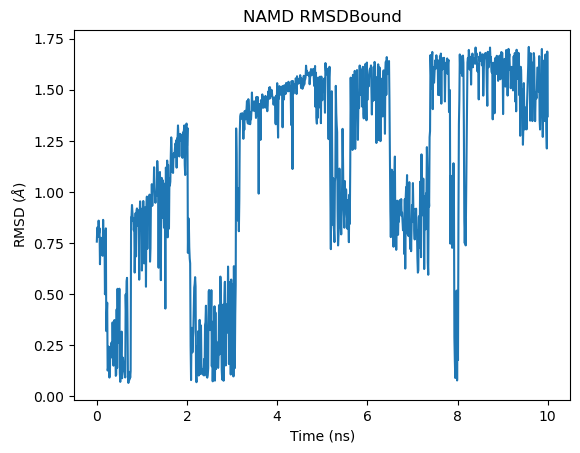

In [3]:
colvars = read_cv('../BFEE_NAMD/001_RMSDBound/output/abf_1.colvars.traj', num=3)
dt = 0.002 # ps
time = colvars[:, 0] * dt / 1000 #(ns)
cv = colvars [:, 1]
plt.plot(time, cv)
plt.xlabel('Time (ns)')
plt.ylabel(r'RMSD ($\AA$)')
plt.title("NAMD RMSDBound")
plt.savefig('figures/rmsdound_NAMD_rmsd.png')

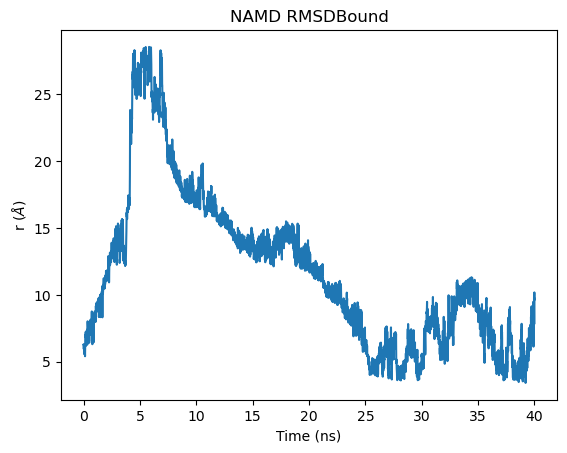

In [10]:
colvars = read_cv('../BFEE_NAMD/007_r/output/abf_1.colvars.traj', num=7)
dt = 0.002 # ps
time = colvars[:, 0] * dt / 1000 #(ns)
cv = colvars [:, 7]
plt.plot(time, cv)
plt.xlabel('Time (ns)')
plt.ylabel(r'r ($\AA$)')
plt.title("NAMD RMSDBound")
plt.savefig('figures/r_step_r.png')

In [11]:
print(time.shape)

(4001,)


1001
1000


/tmp/ipykernel_4591/2114791304.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  eulertheta_openmm_colvars = plumed.read_as_pandas('../../openmm_bfee2/openmm_plumed/002_EulerTheta/COLVAR')
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read


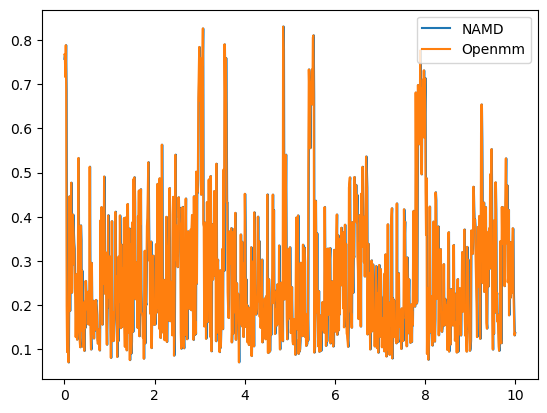

In [15]:
eulertheta_namd_colvars = read_cv('../BFEE_NAMD/002_EulerTheta/output/abf_1.colvars.traj', num=4)
eulertheta_openmm_colvars = plumed.read_as_pandas('../../openmm_bfee2/openmm_plumed/002_EulerTheta/COLVAR')
dt = 0.002 # ps
time_namd = eulertheta_namd_colvars[:, 0] * dt / 1000 #(ns)
cv_namd = eulertheta_namd_colvars[:, 1]
print(len(time_namd))

time_openmm = eulertheta_openmm_colvars['time'] /100
print(len(time_openmm))
cv_openmm = eulertheta_openmm_colvars['rmsd'] * 10

plt.plot(time_namd, cv_namd, label='NAMD')
plt.plot(time_openmm, cv_openmm, label='Openmm')
plt.legend(loc="best")
# plt.xlabel('Time (ns)')
# plt.ylabel(r'r ($\AA$)')
# plt.title("NAMD RMSDBound")
# plt.savefig('figures/r_step_r.png')

/tmp/ipykernel_30877/2314249802.py:2: UserWarning: cannot load PLUMED instance, conversions will not be available
  eulertheta_openmm_colvars = plumed.read_as_pandas('../../openmm_bfee2/openmm_plumed/002_EulerTheta/COLVAR')
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read


1000
1000


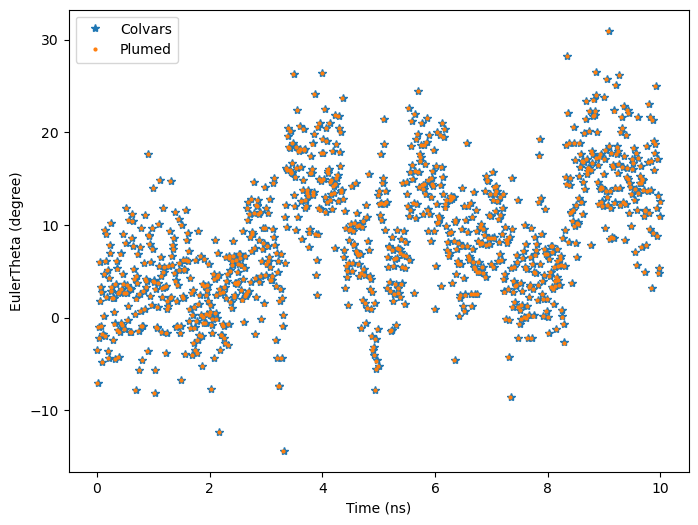

In [6]:
eulertheta_namd_colvars = read_cv('../BFEE_NAMD/000_eq/output/eq.colvars.traj', num=4)
eulertheta_openmm_colvars = plumed.read_as_pandas('../../openmm_bfee2/openmm_plumed/002_EulerTheta/COLVAR')
dt = 0.002 # ps
time_namd = eulertheta_namd_colvars[:, 0] * dt / 1000 #(ns)
time_namd = np.array(time_namd[1:])
cv_namd = eulertheta_namd_colvars[:, 2] #eulerthea
cv_namd = np.array(cv_namd[1:])
print(len(time_namd))

time_openmm = eulertheta_openmm_colvars['time'] /100
print(len(time_openmm))
cv_openmm = eulertheta_openmm_colvars['eulerTheta']


from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=100)
plt.plot(time_namd, cv_namd, '*', label='Colvars' )
plt.plot(time_openmm, cv_openmm, '.', label='Plumed', markersize=4)
plt.xlabel("Time (ns)")
plt.ylabel("EulerTheta (degree)")
plt.legend(loc="best")
plt.savefig("figures/eulertheta_eq_colvars_plumed.svg")


In [7]:
diff = cv_namd - cv_openmm
rmse = np.sqrt(np.mean(diff**2))
print(rmse)


0.004009988636522389


In [31]:
cv_namd[:20]

array([-3.46291226, -7.08143748, -0.97958474, -2.19446081,  6.01529228,
        1.79813399,  3.32776181, -0.92609674,  2.75374572, -4.80254588,
       -1.75579319,  0.19949146,  4.71416171,  9.40419331, -1.9702078 ,
        6.13283438,  9.04900114,  2.17295928,  5.15400241, -3.59880933])

In [32]:
cv_openmm[:20]

0    -3.465383
1    -7.083869
2    -0.983217
3    -2.197229
4     6.011862
5     1.794538
6     3.324882
7    -0.929299
8     2.750472
9    -4.806189
10   -1.759187
11    0.196454
12    4.710895
13    9.400340
14   -1.973858
15    6.129874
16    9.045719
17    2.169869
18    5.150811
19   -3.601511
Name: eulerTheta, dtype: float64